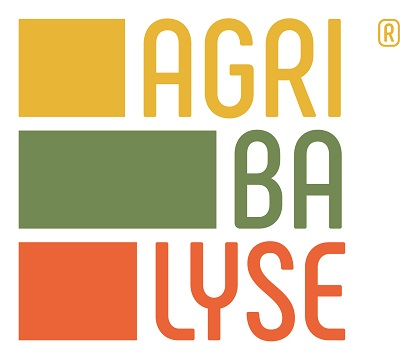

**Bonjour à tous**

**Bienvenue dans notre notebook partie II dédié au projet "FarmPyStep" et issu de la base de donnée Agribalyse 3.0**

**Une vidéo de présentation est disponible dans le lien ci-contre : https://youtu.be/DNdv0TbxJgc**

**Notre projet est disponible dans le lien GitHub suivant : "à définir"**


# <p style="color:blue">Description du projet</p>

Le programme Agribalyse® produit des données de référence sur les impacts environnementaux 
des produits agricoles et alimentaires. Les méthodologies et les données ont été élaborées
et validées dans le cadre d’un partenariat veillant à leur qualité et leur transparence 
(ADEME, INRAE, les instituts techniques agricoles et agroalimentaires, des experts indépendants et des cabinets d’études).

Agribalyse® est la base de données publique française la plus exhaustive d’indicateurs environnementaux des produits agricoles et alimentaires fondés sur l’Analyse du Cycle de Vie. Elle fournit des indicateurs d’impacts environnementaux :
- des principales productions agricoles françaises,
- des principaux produits alimentaires consommés en France.

# <p style="color:blue">Roadmap du Notebook</p>

1. Preprocessing des données

2. Première mise en application de modèles de Machine Learning

Apprentissage supervisé

    - Régression linéaire : Modèle Ridge
    - Régression linéaire : Modèle Lasso

Apprentissage non-supervisé

    - Clustering : K-Means
    - Clustering : Classification ascendante hiérarchique

In [270]:
#Nous importons les premiers packages nécessaires
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# <p style="color:blue">1. Preprocessing des données</p>

In [271]:
#Nous chargeons le fichier "Agribalyse_Detail ingredient.csv" dans un Dataframe appelé df
df = pd.read_csv('Agribalyse_Detail ingredient.csv')

#Nous affichons les 5 premières lignes
df.head()

,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,...,0.046616,0.006761,0.029441,0.052027,1.329230,16.984964,7.404112,0.337769,1.475548,0.251356
1,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Ail,0.004417,0.011444,0.002512,...,0.000781,0.000105,0.000328,0.004760,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
2,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jus de citron,0.019375,0.061230,0.007842,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Huile d'olive,0.445364,1.161825,0.136467,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.100950,9.374618,12.100965,4.424012
4,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Autres étapes,0.080761,0.571172,0.126768,...,0.024611,0.002630,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583


In [272]:
#Nous affichons un résumé des informations du Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5671 entries, 0 to 5670
Data columns (total 22 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Ciqual AGB                                                                5671 non-null   int64  
 1   Ciqual code                                                               5671 non-null   int64  
 2   Nom Français                                                              5671 non-null   object 
 3   Groupe d'aliment                                                          5671 non-null   object 
 4   Sous-groupe d'aliment                                                     5671 non-null   object 
 5   LCI Name                                                                  5671 non-null   object 
 6   Ingredients                                                     

In [273]:
#Nous affichons le nombre de valeurs uniques pour chaque variable du dataframe
df.nunique()

Ciqual AGB                                                                  1038
Ciqual code                                                                 1038
Nom Français                                                                1038
Groupe d'aliment                                                              11
Sous-groupe d'aliment                                                         44
LCI Name                                                                    1036
Ingredients                                                                  213
Score unique EF (mPt/kg de produit)                                         2821
Changement climatique (kg CO2 eq/kg de produit)                             2823
Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)       2824
Rayonnements ionisants (kBq U-235 eq/kg de produit)                         2831
Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)            2826
Particules (E-06 disease inc

In [274]:
#Nous renommons les colonnes pour gagner en lisibilité dans la construction des dataviz et la lecture des données.
NewCols={"Code AGB":"Code_AGB",
    "Code CIQUAL":"Code_CIQUAL",
    "Groupe d'aliment":"Group_aliment",
    "Sous-groupe d'aliment":"Sous_group_aliment",
    "Nom du Produit en Français":"Nom_produit",
    "LCI Name":"LCI",
    "Saisonnalité":"saisonnalite",
    "Transport par avion (1 : par avion)":"usage_avion",
    "Livraison":"Mode_Livraison",
    "Matériau d'emballage":"Type_emballage",
    "Préparation":"Mode_Preparation",
    "DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)":"DQR",
    "Score unique EF (mPt/kg de produit)":"Score_EF",
    "Changement climatique (kg CO2 eq/kg de produit)":"Change_clima",
    "Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)":"impact_ozone",
    "Rayonnements ionisants (kBq U-235 eq/kg de produit)":"rayons_ionisants",
    "Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)":"photochimique_ozone",
    "Particules (E-06 disease inc./kg de produit)":"particules",
    "Acidification terrestre et eaux douces (mol H+ eq/kg de produit)":"acidification",
    "Eutrophisation terreste (mol N eq/kg de produit)":"Eutrophisation_terre",
    "Eutrophisation eaux douces (E-03 kg P eq/kg de produit)":"Eutrophisation_eau_douce",
    "Eutrophisation marine (E-03 kg N eq/kg de produit)":"Eutrophisation_eau_marine",
    "Utilisation du sol (Pt/kg de produit)":"usage_sol",
    "Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)":"ecotoxicite",
    "Épuisement des ressources eau (m3 depriv./kg de produit)":"epuisement_eau",
    "Épuisement des ressources énergétiques (MJ/kg de produit)":"epuisement_energie",
    "Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)":"epuisement_mineraux"}

df.rename(columns=NewCols, inplace=True)

In [275]:
#Nous contrôlons les modifications
df.columns

Index(['Ciqual AGB', 'Ciqual code', 'Nom Français', 'Group_aliment',
       'Sous_group_aliment', 'LCI', 'Ingredients', 'Score_EF', 'Change_clima',
       'impact_ozone', 'rayons_ionisants', 'photochimique_ozone', 'particules',
       'acidification', 'Eutrophisation_terre', 'Eutrophisation_eau_douce',
       'Eutrophisation_eau_marine', 'usage_sol', 'ecotoxicite',
       'epuisement_eau', 'epuisement_energie', 'epuisement_mineraux'],
      dtype='object')

In [276]:
#Nous stockons les valeurs numériques dans une variable num_data
num_data = df[['Score_EF', 'Change_clima',
       'impact_ozone', 'rayons_ionisants', 'photochimique_ozone', 'particules',
       'acidification', 'Eutrophisation_terre', 'Eutrophisation_eau_douce',
       'Eutrophisation_eau_marine', 'usage_sol', 'ecotoxicite',
       'epuisement_eau', 'epuisement_energie', 'epuisement_mineraux']]

In [277]:
#Nous centrons et réduisons les variables numériques 
scaler = preprocessing.StandardScaler().fit(num_data)
num_data = pd.DataFrame(scaler.transform(num_data))

In [278]:
#Nous remettons le nom des colonnes
num_data.columns = ['Score_EF', 'Change_clima',
       'impact_ozone', 'rayons_ionisants', 'photochimique_ozone', 'particules',
       'acidification', 'Eutrophisation_terre', 'Eutrophisation_eau_douce',
       'Eutrophisation_eau_marine', 'usage_sol', 'ecotoxicite',
       'epuisement_eau', 'epuisement_energie', 'epuisement_mineraux']

In [279]:
#Nous contrôlons un échantillon de 5 lignes
num_data.head(5)

,Score_EF,Change_clima,impact_ozone,rayons_ionisants,photochimique_ozone,particules,acidification,Eutrophisation_terre,Eutrophisation_eau_douce,Eutrophisation_eau_marine,usage_sol,ecotoxicite,epuisement_eau,epuisement_energie,epuisement_mineraux
0,-0.251312,-0.286810,-0.325728,-0.261733,-0.165958,-0.112503,-0.099023,-0.079367,-0.246872,-0.239314,-0.152290,-0.228677,-0.163080,-0.347541,-0.428323
1,-0.413337,-0.359560,-0.395887,-0.291437,-0.220515,-0.329409,-0.313844,-0.309420,-0.428276,-0.381148,-0.268525,-0.354763,-0.176923,-0.410359,-0.509471
2,-0.344731,-0.335935,-0.363586,-0.286019,-0.194190,-0.302983,-0.286540,-0.283774,-0.381613,-0.378192,-0.252891,-0.326058,0.166405,-0.381919,-0.451309
3,1.609128,0.186330,0.415913,-0.190247,0.764627,0.339086,0.377401,0.386989,1.681022,0.748454,-0.223551,9.077243,2.523692,0.188314,1.595269
4,-0.063178,-0.093953,0.357137,0.695529,-0.064959,-0.216634,-0.232359,-0.245889,-0.099700,-0.243520,-0.246658,-0.146568,-0.037687,0.719111,0.069846


# <p style="color:blue">2. Première mise en application de modèles de Machine Learning</p>

**<p style="color:green">Nous proposons de prédire le résultat de la colonne Change_clima.<br>
L'indicateur Changement climatique (kg CO2 eq/kg de produit) est l'indicateur le plus connu. 
<br>Pour rappel, il correspond à la modification du climat, affectant l’écosystème global.
<br><br> La colonne Score_EF sera retirée du jeux de données : en effet, il est calculé avec des facteurs de pondération pour chacun des indicateurs et n'a pas d'intérêt à être conservé.**

In [280]:
#Nous séparons les données en un ensemble d'apprentissage et un ensemble de test (20%)
#avec feats comme données explicatives et Change_clima comme variable cible.
target = num_data['Change_clima']
feats = num_data.drop(['Score_EF','Change_clima'], axis=1)

In [281]:
#Nous séparons les données en un ensemble d'apprentissage (X_train, y_train) et un ensemble de test(X_test, y_test), 
#avec 20% des données originales pour le test
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2)

**<p style="color:purple">Régression linéaire régularisée : Modèle Ridge**

***Le Modèle Ridge est une régression linéaire avec une contrainte quadratique sur les coefficients.<br>
Elle est utile lorsque des variables sont très corrélées, ce qui fausse souvent la résolution numérique.***

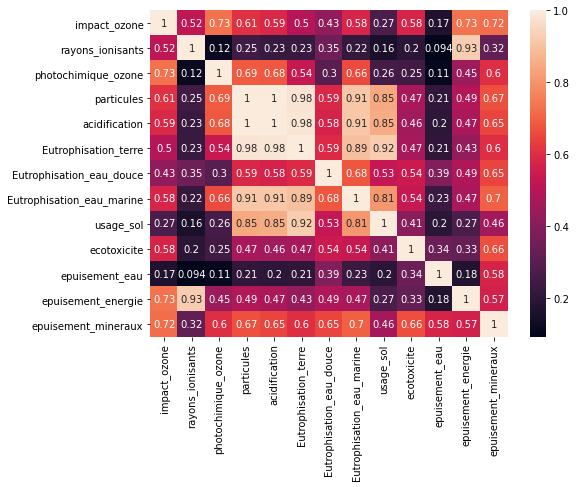

In [282]:
#Affichons une matrice des corrélations
corr_df = feats.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

***Dans notre cas, nous avons des variables fortement corrélées :
<br> >0.95, avec par ex: entre les variables Eutrophisation_terre et particules ou acidification***

In [283]:
#Nous proposons un modèle de régression Ridge ridge_reg qui choisira le meilleur alpha puis nous l'ajustons
#aux données d'apprentissage
ridge_reg = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 3.e-01, 7.e-01, 1.e+00, 1.e+01, 5.e+01,
       1.e+02]))

***Nous allons à présent utiliser un premier indicateur pertinent : le coefficient de determination : R2.<br>
Plus R2 est proche de 1, meilleure est la prédiction.***

In [284]:
#Nous affichons le α retenu par le modèle grâce à l'attribut alpha_.
#Nous affichons le score (R²) du modèle sur l'ensemble d'entraînement puis sur l'ensemble de test.

print( "alpha sélectionné par c-v :" ,ridge_reg.alpha_)
print("score train :", ridge_reg.score(X_train, y_train))
print("score test :", ridge_reg.score(X_test, y_test))

alpha sélectionné par c-v : 0.01
score train : 0.9370298585029476
score test : 0.9343037132115509


**<p style="color:blue">Les scores obtenus entre l'ensemble d'entraînement et sur l'ensemble de test sont très corrects<p style="color:blue">**

In [285]:
#Nous stockons dans ridge_pred_train les valeurs ajustées du modèle.
#Nous stockons dans ridge_pred_test les prédictions du modèle pour X_test.
ridge_pred_train = ridge_reg.predict(X_train)
ridge_pred_test = ridge_reg.predict(X_test)

***Nous allons à présent utiliser un second indicateur pertinent : L’erreur quadratique moyenne ou RMSE.<br>
Cet indice fournit une indication par rapport à la dispersion ou la variabilité de la qualité de la prédiction.***

In [286]:
#Nous affichons l'erreur quadratique moyenne de prédiction pour ridge_pred_train et ridge_pred_test, 
#grâce à la fonction mean_squarred_error.

print("mse train:", mean_squared_error(ridge_pred_train, y_train))
print("mse test:", mean_squared_error(ridge_pred_test, y_test))

mse train: 0.06473897667596279
mse test: 0.05831993144153358


**<p style="color:blue">L'écart d'erreur est sensible entre l'échantillon d'entraînement et l'échantillon de test.
    <br>Avec un score positif, la fonction prédictive se généralise bien.
    Le modèle subit un léger overfitting.<p style="color:blue">**

**<p style="color:purple">Régression linéaire régularisée : Modèle Lasso**

***Le modèle Lasso est également une régression linéaire avec une contrainte linéaire sur les coefficients.
<br> Comme le modèle Ridge, il est utile lorsque les variables sont très corrélées. 
<br> La solution ne s’exprime de façon exacte et la résolution utilise une méthode à base de gradient.***

In [287]:
#Nous proposons un modèle de régression Lasso qui choisira le meilleur alpha que nous ajusterons
#aux données d'apprentissage
model_lasso = LassoCV(alphas = [0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0]).fit(X_train, y_train)

C:\Users\DIAZJ\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5195252578089367, tolerance: 0.4023988913286727
  model = cd_fast.enet_coordinate_descent_gram(


In [288]:
#Nous affichons le α retenu par le modèle grâce à l'attribut alpha_.
#Nous affichons le score (R²) du modèle sur l'ensemble d'entraînement puis sur l'ensemble de test.

print( "alpha sélectionné par c-v :" ,model_lasso.alpha_)
print("score train:",model_lasso.score(X_train,y_train))
print("score test :", model_lasso.score(X_test,y_test))

alpha sélectionné par c-v : 0.001
score train: 0.9103492711728636
score test : 0.8956158170240267


**<p style="color:blue">Les scores obtenus entre l'ensemble d'entraînement et sur l'ensemble de test sont corrects.
    <br>Néanmoins, ils obtiennent des résultats inférieurs au modèle Ridge<p style="color:blue">**

In [289]:
#Nous stockons dans lasso_pred_train les valeurs ajustées du modèle.
#Nous stockons dans lasso_pred_test les prédictions du modèle pour X_test.
lasso_pred_train = model_lasso.predict(X_train)
lasso_pred_test = model_lasso.predict(X_test)

In [290]:
#Nous affichons l'erreur quadratique moyenne de prédiction pour ridge_pred_train et ridge_pred_test, 
#grâce à la fonction mean_squarred_error.

print("mse train:", mean_squared_error(lasso_pred_train, y_train))
print("mse test:", mean_squared_error(lasso_pred_test, y_test))

mse train: 0.09216902335839165
mse test: 0.09266396462165981


**<p style="color:blue">Les résultats sont aussi bons sur l'échantillon de test qu'avec la régression Ridge.
<br>A noter que l'écart entre les erreurs et les scores sont cette fois-ci infimes. Le modèle ne souffre pas d'overfitting.<p style="color:blue">**

**Creusons un peu l'analyse du modèle Lasso sous forme de graphiques.**

In [291]:
#Nous affichons le nombre de variables conservées et éliminées par le modèle Lasso

coef  = pd.Series(model_lasso.coef_, index = X_test.columns)
print("Le modèle Lasso conserve " + str(sum(coef != 0)) + " variables et élimine les " +  
      str(sum(coef == 0)) + " autres variables")

Le modèle Lasso conserve 11 variables et élimine les 2 autres variables


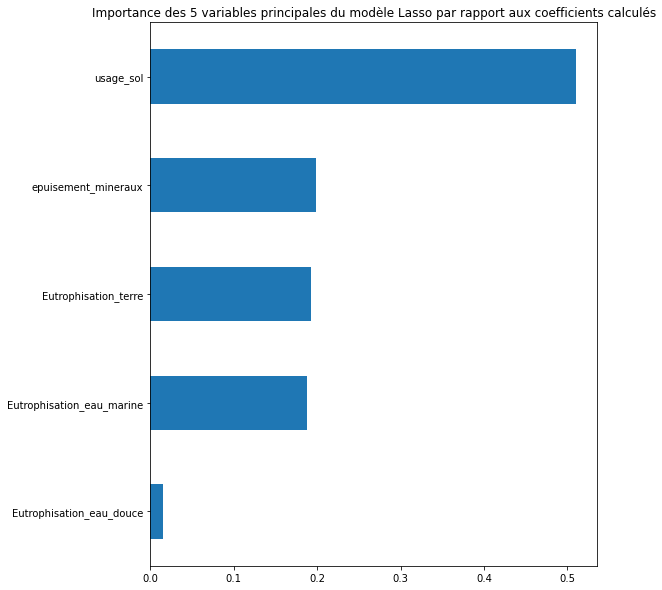

In [292]:
#Nous affichons par ordre décroissant l'importance des 5 premières variables du modèle Lasso,
#par rapport aux coefficients calculés à l'aide d'un graphique en barre.

imp_coef_var = pd.concat([coef.sort_values().tail(5)])

plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef_var.plot(kind = "barh")
plt.title("Importance des 5 variables principales du modèle Lasso par rapport aux coefficients calculés");

**<p style="color:blue">La variable la plus importante du modèle est 'usage_sol'.
    <br>Pour rappel, cette catégorie reflète l’impact d’une activité sur la dégradation des terres, en référence à « l’état naturel ».**

***Nous proposons de comparer les variables selectionnées ou non par la régression Lasso, en fonction du α***

In [293]:
#Nous importons la fonction lasso_path
from sklearn.linear_model import lasso_path

In [294]:
#A partir de la fonction lasso_path, nous produisons les coefficients estimés corrrespondant aux différents α 
#qu'elle reçoit en arguments.

#Nous vérifions les dimensions de coefs_lasso 
mes_alphas = (0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0)
alpha_path, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=mes_alphas)
coefs_lasso.shape

(13, 10)

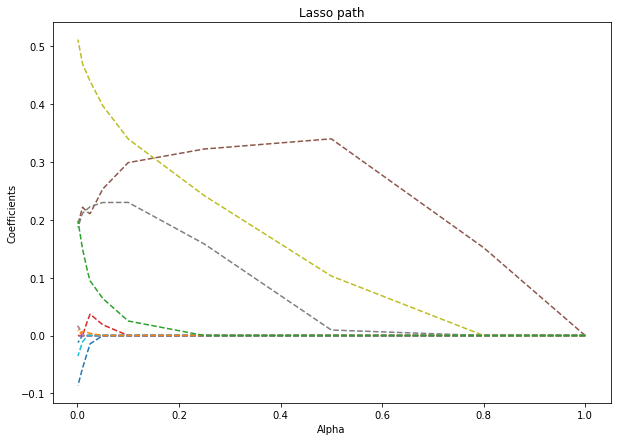

In [295]:
#Nous affichons dans un graphique, pour chaque variable explicative, la courbe des valeurs du coefficient 
#estimé correspondant en fonction des valeurs prises par αα dans alpha_path.

import matplotlib.cm as cm

plt.figure(figsize=(10,7))

for i in range(coefs_lasso.shape[0]):
    plt.plot(alpha_path, coefs_lasso[i,:], '--')

plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path')
plt.show()

**<p style="color:blue">Le graphique nous montre qu'à partir de α=0.3, 3 variables sont sélectionnées par le modèle.**

***A présent, terminons par un dernier graphique :
<br>-la courbe représentant les erreurs MSE en fonction des valeurs de αα pour chaque échantillon de la validation croisée.
<br>-la courbe représentant la moyenne des scores MSE sur tous les échantillons, en fonction des valeurs de αα testés.
<br>-une ligne verticale sur la valeur de α sélectionnée par le modèle.***

C:\Users\DIAZJ\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.078145831931579, tolerance: 0.450765131166121
  model = cd_fast.enet_coordinate_descent_gram(


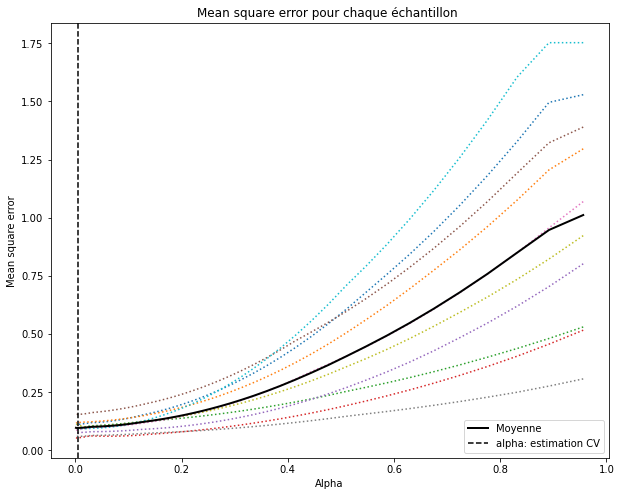

In [296]:
model_lasso = LassoCV(cv=10).fit(X_train, y_train)

alphas = model_lasso.alphas_

plt.figure(figsize = (10,8))
plt.plot(alphas, model_lasso.mse_path_, ':')
plt.plot(alphas, model_lasso.mse_path_.mean(axis=1), 'k',
         label='Moyenne', linewidth=2)
plt.axvline(model_lasso.alpha_, linestyle='--', color='k',
            label='alpha: estimation CV')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error pour chaque échantillon ')
plt.show()

***************************************************************************************************

**<p style="color:green">A présent tentons l'expérience d'un apprentissage non supervisé, l'objectif étant que l'algorithme recherche les structures naturelles dans les données.<br> Nous utiliserons les méthodes de data clustering.<br>**

In [297]:
#Nous repartons de notre Dataframe initial df.
#Nous conserverons les données des 14 indicateurs et la colonne 'Sous-groupe d'aliment' 
#comme index dans un nouveau Dataframe appelé clu

clu = df[['Group_aliment', 'Change_clima',
       'impact_ozone', 'rayons_ionisants', 'photochimique_ozone', 'particules',
       'acidification', 'Eutrophisation_terre', 'Eutrophisation_eau_douce',
       'Eutrophisation_eau_marine', 'usage_sol', 'ecotoxicite',
       'epuisement_eau', 'epuisement_energie', 'epuisement_mineraux']]
clu.set_index('Group_aliment', inplace = True)
clu.head(5)

,Change_clima,impact_ozone,rayons_ionisants,photochimique_ozone,particules,acidification,Eutrophisation_terre,Eutrophisation_eau_douce,Eutrophisation_eau_marine,usage_sol,ecotoxicite,epuisement_eau,epuisement_energie,epuisement_mineraux
Group_aliment,,,,,,,,,,,,,,
aides culinaires et ingrédients divers,0.164754,0.014089,0.027466,0.631131,0.046616,0.006761,0.029441,0.052027,1.329230,16.984964,7.404112,0.337769,1.475548,0.251356
aides culinaires et ingrédients divers,0.011444,0.002512,0.004964,0.057538,0.000781,0.000105,0.000328,0.004760,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
aides culinaires et ingrédients divers,0.061230,0.007842,0.009068,0.334306,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
aides culinaires et ingrédients divers,1.161825,0.136467,0.081623,10.414980,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.100950,9.374618,12.100965,4.424012
aides culinaires et ingrédients divers,0.571172,0.126768,0.752666,1.693003,0.024611,0.002630,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583


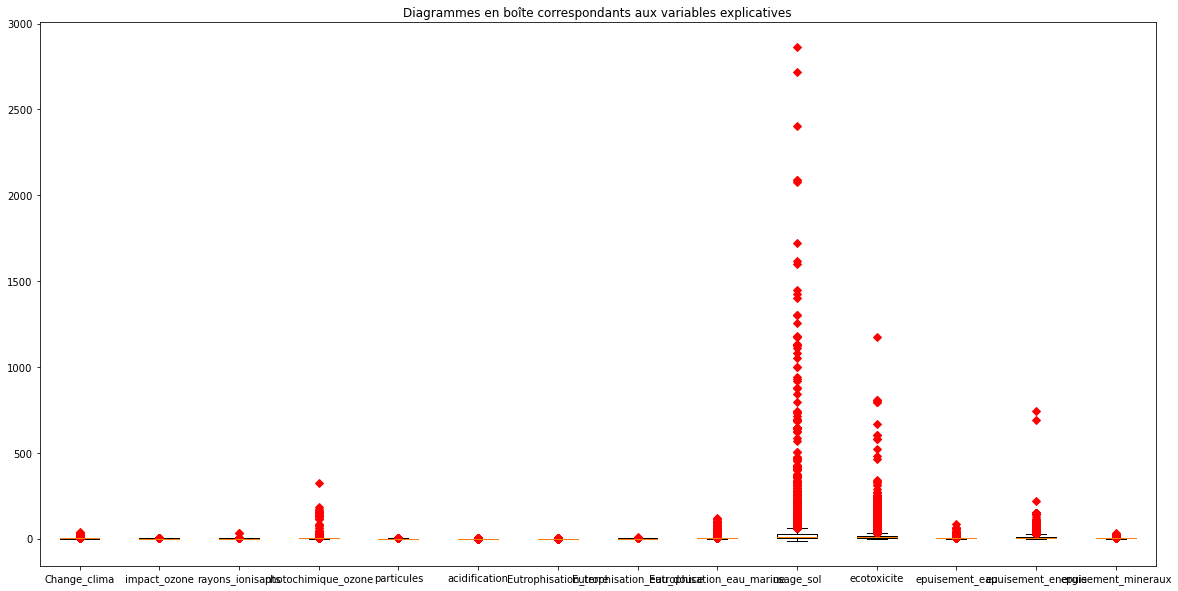

In [298]:
#Détectons les valeurs aberrantes

#Récupération des indices des colonnes 
ls_features = list(clu.keys())

# Diagramme en boîte (boxplot) de toutes les variables explicatives
plt.figure(figsize=(20, 10))
plt.title('Diagrammes en boîte correspondants aux variables explicatives')
plt.boxplot(clu.values, 0, 'rD', labels = ls_features)

plt.show()

**Une normalisation des données est indispensable, néanmoins, cette fois-ci nous utiliserons le sous-module<p style="color:red">MinMaxScaler<p>de sklearn.preprocessing pour normaliser 
les données à l'aide de la transformation Min-Max.**

In [299]:
#J'importe le sous-module MinMaxScaler du package sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

In [300]:
#Nous normalisons les données
scaler = MinMaxScaler()
keepCols = ['Change_clima',
       'impact_ozone', 'rayons_ionisants', 'photochimique_ozone', 'particules',
       'acidification', 'Eutrophisation_terre', 'Eutrophisation_eau_douce',
       'Eutrophisation_eau_marine', 'usage_sol', 'ecotoxicite',
       'epuisement_eau', 'epuisement_energie', 'epuisement_mineraux']
scaled_clu = scaler.fit_transform(clu[keepCols])
scaled_clu = pd.DataFrame(scaled_clu,columns=keepCols)

In [301]:
#Nous vérifions la normalisation des données en affichant les 5 premières lignes
scaled_clu.head(5)

,Change_clima,impact_ozone,rayons_ionisants,photochimique_ozone,particules,acidification,Eutrophisation_terre,Eutrophisation_eau_douce,Eutrophisation_eau_marine,usage_sol,ecotoxicite,epuisement_eau,epuisement_energie,epuisement_mineraux
0,0.004775,0.004071,0.000823,0.001950,0.014199,0.013849,0.013567,0.005794,0.010973,0.011310,0.006292,0.004071,0.001987,0.008182
1,0.000505,0.000726,0.000149,0.000178,0.000238,0.000215,0.000151,0.000530,0.001568,0.005981,0.001034,0.003510,0.000310,0.002735
2,0.001892,0.002266,0.000272,0.001033,0.001939,0.001948,0.001647,0.001884,0.001764,0.006698,0.002231,0.017428,0.001069,0.006639
3,0.032551,0.039437,0.002445,0.032186,0.043266,0.044087,0.040764,0.061740,0.076466,0.008043,0.394408,0.112992,0.016296,0.144012
4,0.016097,0.036634,0.022542,0.005232,0.007497,0.005386,0.003856,0.010065,0.010694,0.006983,0.009717,0.009155,0.030470,0.041621


**<p style="color:purple">Clustering : K-Means**

**L’algorithme des k-moyens regroupe les points en k clusters. <br>Cela suppose qu’il faut avoir une idée du nombre de clusters pour appliquer cet algorithme.<br>Nous lançons une première tentative de l'algorithme en prenant clusters = 2**

In [302]:
#Nous importons la fonction KMeans
from sklearn.cluster import KMeans

In [303]:
#Algorithme de K-means
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_clu)

#Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

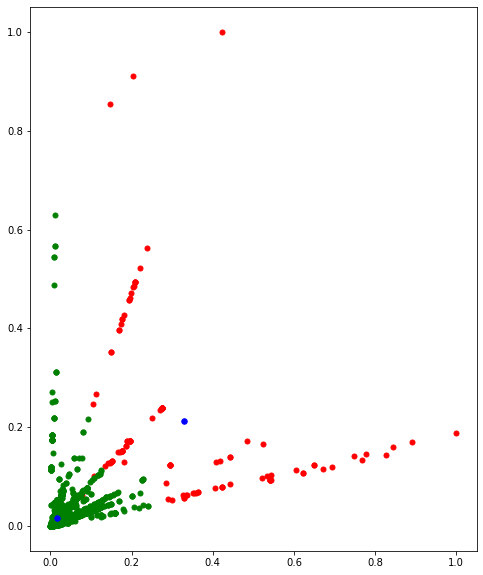

In [304]:
#Lançons une visualitions des clusters et des centroïdes 

#Liste des couleurs
colors = ["g.","r."]

#Graphique du nuage de points attribués au cluster correspondant
for i in range(len(scaled_clu)):
    plt.plot(scaled_clu.iloc[i,0], scaled_clu.iloc[i,1], colors[labels[i]], markersize = 10)

#Graphique des centroïdes
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()

 **Au vu du graphique ci-dessus, le choix de k = 2 ne parait pas optimal.<br>Le choix du nombre de clusters k optimal est un arbitrage entre la compacité des clusters et leur séparation.<br> Calculons les distortions selon différents modèles afin d'identifier le nombre de clusters optimal avec la méthode du coude.**

In [305]:
#Nous importons la fonction cdist du package scipy.spatial.distance
from scipy.spatial.distance import cdist

#Nous choisissons la liste des nombre de clusters suivantes
range_n_clusters = [2, 3, 4, 5, 6]  

#Nous initialisons la liste de distortions
distortions = []

#Nous calculons des distortions pour les différents modèles
for n_clusters in range_n_clusters:
    
    #Nous initialisons un cluster ayant un pour nombre de clusters n_clusters
    cluster = KMeans(n_clusters = n_clusters)
    
    #Nous lançons l'pprentissage des données suivant le cluster construit ci-dessus
    cluster.fit(scaled_clu)
    
    #Nous ajoutons la nouvelle distortion à la liste des données
    distortions.append(sum(np.min(cdist(scaled_clu, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(num_data, axis = 0))

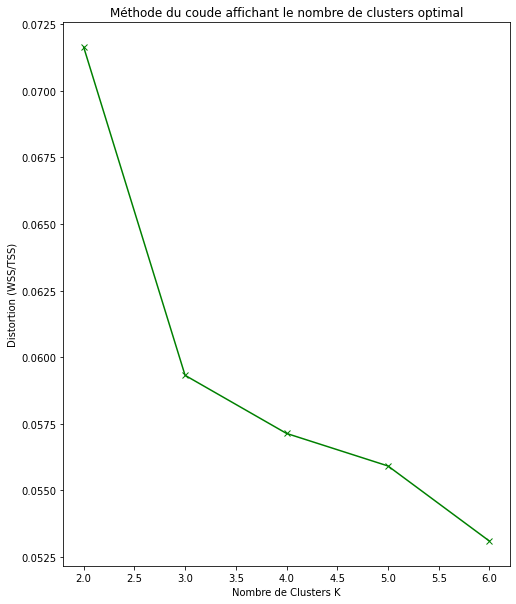

In [306]:
#Nous affichons les distortions en fonction du nombre de clusters
plt.plot(range_n_clusters, distortions, 'gx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distortion (WSS/TSS)')
plt.title('Méthode du coude affichant le nombre de clusters optimal')
plt.show()

 **La courbe obtenue décroit fortement et change de trajectoire après k = 3.<br>Ainsi, le nombre de clusters optimal est 3**

**Nous relançons l'algorithme de clustering avec n_clusters = 3**

In [307]:
#Algorithme de K-means avec 3 clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_clu)

#Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

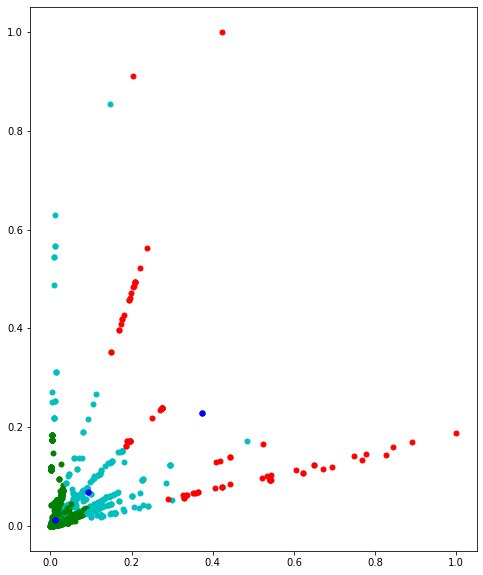

In [308]:
#Lançons à nouveau une visualitions des clusters et des centroïdes  

#Liste des couleurs
colors = ["g.","r.","c."]

#Graphique du nuage de points attribués au cluster correspondant
for i in range(len(scaled_clu)):
    plt.plot(scaled_clu.iloc[i,0], scaled_clu.iloc[i,1], colors[labels[i]], markersize = 10)

#Graphique des centroïdes
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()

**<p style="color:blue">Conclusion : à la lecture du graphique ci-dessus, le choix de k = 3 est plus probant.**

**<p style="color:purple">Clustering : Classification ascendante hiérarchique**

**La CAH (classification ascendante hiérarchique) est un autre algorithme de machine learning non supervisée.<br>Comme les k-means, elle permet d’identifier des groupes homogènes dans une population (clustering) notamment avec un  dendrogramme.**

In [309]:
#Nous importons la fonction AgglomerativeClustering du package sklearn.cluster
from sklearn.cluster import AgglomerativeClustering

In [310]:
#Initialisation du classificateur CAH pour 4 clusters
cluster = AgglomerativeClustering(n_clusters = 4)

#Apprentissage des données 
cluster.fit(clu[ls_features])

#Calcul des labels du data set
labels = cluster.labels_

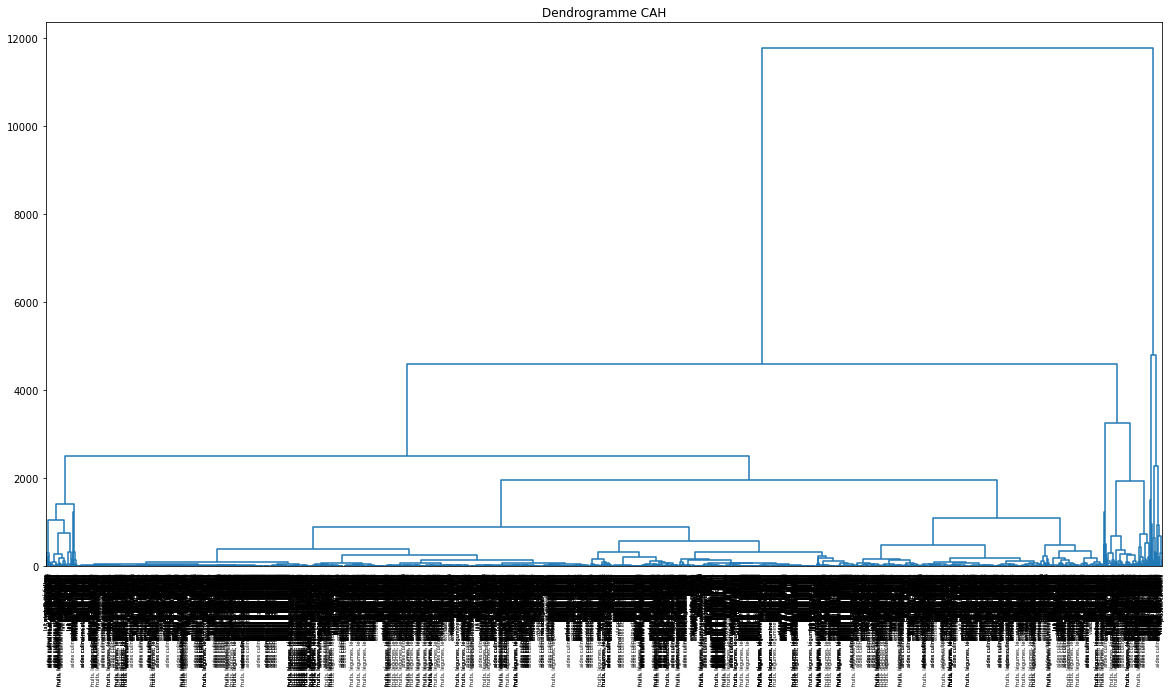

In [311]:
#Nous importons les packages nécessaires pour la CAH
from scipy.cluster.hierarchy import dendrogram, linkage

#Nous initialisons la figrue
plt.figure(figsize=(20, 10))

#Nous générons une matrice des liens
Z = linkage(clu, method = 'ward', metric = 'euclidean')

#Nous affichons le dendrogramme
plt.title("Dendrogramme CAH")
dendrogram(Z, labels = clu.index, leaf_rotation = 90., color_threshold = 0)
plt.show()

**Le dendrogramme suggère un découpage en 2 ou 3 groupes**

**Etant donné la difficulté à évaluer cette méthode non supervisée, nous allons mesurer la qualité grâce au coefficient de silhouette.
<br>Pour rappel, il est compris entre -1 et 1. Le coefficient est d'autant plus proche de 1 que l'assignation de x à son cluster est satisfaisante.**

In [312]:
#Nous importons la fonction silhouette_score du package sklearn.metrics
from sklearn.metrics import silhouette_score

#Nous calculons le coefficient silhouette
silhouette_score(clu, labels, metric='sqeuclidean')

0.908646692413386

**Le score obtenu est très correct. Néanmoins, tentons d'améliorer ce résultat et vérifier s'il existe un nombre de cluster encore plus optimal.**

**Comme pour les K-means, traçons cette fois-ci un graphique des coefficients de silhouette en fonction du nombre de clusters correspondants pour identifier le nombre optimal**

In [313]:
# Définition de la liste de n_clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

# Initialisation de la liste des coefficients de la silhouette score
s_scores = []

# Calcul du coefficient de silhouette pour les différentes valeurs de n_clusters
for n_clusters in range_n_clusters :
    
    # Initialisation du classificateur CAH pour n_clusters
    cluster = AgglomerativeClustering(n_clusters = n_clusters)

    # Apprentissage des données 
    cluster.fit(clu[ls_features])

    # Calcul des labels du data set
    labels = cluster.labels_
    
    # Caclul du coefficient de silhouette
    s_score = silhouette_score(clu, labels, metric='sqeuclidean')
    s_scores.append(s_score)

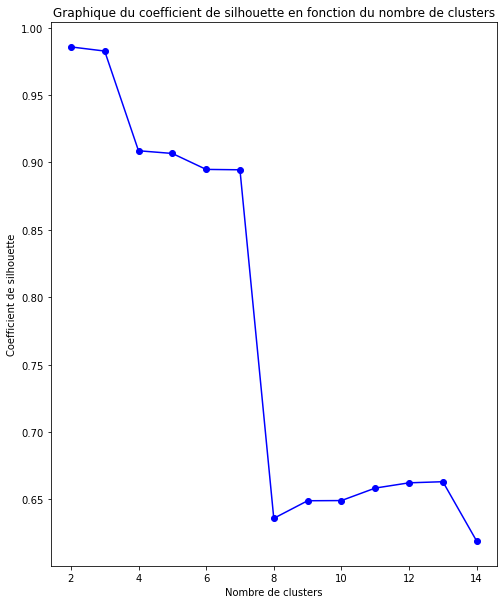

In [314]:
#Nous affichons le graphique du coefficient de silhouette en fonction du nombre de clusters
plt.plot(range_n_clusters, s_scores, 'bo-')
plt.title('Graphique du coefficient de silhouette en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.show()

**Un nombre de clusters à 2 semble le choix optimal même s'il est suivi de près par le nombre de 3 clusters.**

In [315]:
#Initialisation du classificateur CAH pour 2 clusters
cluster = AgglomerativeClustering(n_clusters = 2)

#Apprentissage des données 
cluster.fit(clu[ls_features])

#Calcul des labels du data set
labels = cluster.labels_

In [316]:
#Nous calculons le coefficient silhouette
silhouette_score(clu, labels, metric='sqeuclidean')

0.9856974515155076

**<p style="color:blue">Le score est excellent et tout proche de 1.**

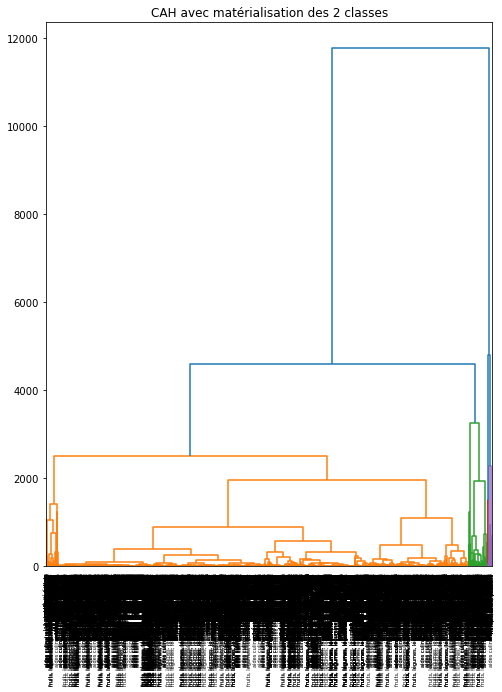

In [317]:
#Matérialisation des 2 classes (hauteur t = 4 300)
plt.title('CAH avec matérialisation des 2 classes')
dendrogram(Z, labels = clu.index, leaf_rotation = 90., color_threshold = 4300)
plt.show()

**<p style="color:green">L'inconvénient de cette méthode est qu'elle n'est pas adaptée aux grands volumes de données.
<br>Les temps de calcul sont trop importants. <br>Cependant, il existe une solution alternative : en effet, nous pouvions coupler la CAH à un k-means. C’est ce qu’on appelle la méthode mixte.**

**<p style="color:blue">Conclusion : au regard des résultats obtenus avec la méthode K-means et CAH, le nombre de clusters se situe bien dans un intervalle entre 2 et 3 clusters.**